In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Theoretical justification for confidence intervals

Assume, as in the previous section, that we have a population parameter of interest $\theta$, and an estimate based on a sample of $n$ observations, $\hat\theta$. We also assume that the sampling distribution of $(\hat\theta-\theta)$ is known. In the next section, we will show a method for obtaining an approximation to this sampling distribution.

The figure below shows the sampling distribution and some percentiles that will be useful for our illustration:

<img align="center" src="./middle98chisq.png" width="400"/>

We define $L_0$ to be the 1% percentile of this distribution (that is 1% of of the distribution lies below $L_0$), and $U_0$ to be the 99% percentile.

It is clear that, with probability 0.98,

$$L_0\leq\hat\theta-\theta\leq U_0$$

which can be rewritten as

$$\hat\theta-U_0\leq \theta\leq \hat\theta-L_0$$

 We call $[ \hat\theta-U_0, \hat\theta-L_0]$ a  **98% confidence interval**.
 
 Some notes:
- The ends of the interval depend on the percentiles but also on the data (through $\hat\theta$) and are random (different samples result in different confidence intervals).
- The probability statement we made was about the distribution of $(\hat\theta-\theta)$.
- About 98\% of the intervals constructed like this will cover the true population parameter $\theta$.
- If we change the percentiles we get intervals with different confidence. For example, if $L_0$ is the 5% percentile and $U_0$ is 95% percentile, we will obtain a 90% confidence interval.

We illustrate the above concepts with a simple example where the sampling distribution is known. Assume we sample 4 independent observations from a normal population with mean equal to -2 and standard deviation equal to 1. The parameter of interest is the population mean ($\theta=-2$). It is known from probability theory that sampling distribution of the sample mean is N(-2,1/2) and this allows us to obtain the sampling distribution for $(\hat\theta-\theta)$, N(0,1/2), and its percentiles of interest. Below is the code that generates 90% confidence intervals. Note that to calculate percentiles of the normal distribution we use the `norm.ppf` function from the `scipy` library - this function requires us to specify the mean (location) and standard deviation (scale) of the normal distribution of interest.

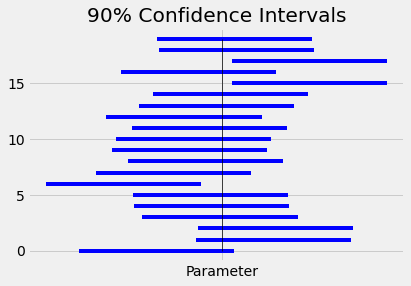

In [2]:
from scipy.stats import norm

# the percentiles needed for 90% CIs
L0=norm.ppf(0.05, loc=0, scale=1/2)
U0=norm.ppf(0.95, loc=0, scale=1/2)

# draw twenty 90% CIs
plt.xticks([-2], ['Parameter'])
plt.title('90% Confidence Intervals')
for i in np.arange(20):
    theta0=np.mean(np.random.normal(size=4,loc=-2,scale=1))
    plt.plot([theta0-U0, theta0-L0], [i, i], color='blue')
plt.plot([-2,-2],[0,19],color="black",linewidth=0.7);

In the above plot, the vertical line is the location of the population parameter. Note that not all CIs contain that value. 

The above code relied on our knowledge of the sampling distribution for $(\hat\theta-\theta)$. In classical statistics, this distribution is obtained mathematically using probability laws such as the central limit theorem. 

The next section describes a method for approximating the sampling distribution using only the data in the sample.